Based on https://techcommunity.microsoft.com/t5/educator-developer-blog/how-to-implement-the-backpropagation-using-python-and-numpy/ba-p/378895
# How to implement the backpropagation using Python and NumPy
By Lee Stott
## First published on MSDN on Jul 04, 2017
I was recently speaking to a University Academic and we got into the discussion of practical assessments for Data Science Students, One of the key principles students learn is how to implement the back-propagation neural network training algorithm. Many students start by learning this method from scratch, using just Python 3.x and the NumPy package.

The following is a Guest post by Dr. James McCaffrey Microsoft Research this article was originally published at Visual Studio Magazine the article has been increased to include some additional resources and interactive demos using the Azure Notebooks Service.

After reading this you should have a solid grasp of back-propagation, as well as knowledge of Python and NumPy techniques that will be useful when working with libraries such as CNTK and TensorFlow. .

## Example using the Iris Dataset
The [Iris Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set) has over 150 item records. Each item has four numeric predictor variables (often called features): sepal length and width, and petal length and width, followed by the species ("setosa," "versicolor" or "virginica").

The demo program uses 1-of-N label encoding

- setosa = (1,0,0)
- versicolor = (0,1,0)
- virginica = (0,0,1)
The goal is to predict species from sepal and petal length and width.  The 150-item dataset has 50 setosa items, followed by 50 versicolor, followed by 50 virginica. Before writing the demo program,

There is a 120-item file of training data (using the first 30 of each species) and a 30-item file of test data (the leftover 10 of each species). https://github.com/leestott/IrisData/blob/master/irisTrainData.txt

The demo program creates a simple neural network with four input nodes (one for each feature), five hidden processing nodes (the number of hidden nodes is a free parameter and must be determined by trial and error), and three output nodes (corresponding to encoded species). The demo loaded the training and test data into two matrices.

The back-propagation algorithm is iterative and you must supply a maximum number of iterations (50 in the demo) and a learning rate (0.050) that controls how much each weight and bias value changes in each iteration. Small learning rate values lead to slow but steady training. Large learning rates lead to quicker training at the risk of overshooting good weight and bias values. The max-iteration and leaning rate are free parameters.

The demo displays the value of the mean squared error, every 10 iterations during training. As you'll see shortly, there are two error types that are commonly used with back-propagation, and the choice of error type affects the back-propagation implementation. After training completed, the demo computed the classification accuracy of the resulting model on the training data (0.9333 = 112 out of 120 correct) and on the test data (0.9667 = 29 out of 30 correct). The classification accuracy on a set of test data is a very rough approximation of the accuracy you'd expect to see on new, previously unseen data.

The demo program is too long to present in its entirety in this article, but the complete source code is available in the accompanying file download. https://github.com/leestott/IrisData

## Understanding Back-Propagation

Back-propagation is arguably the single most important algorithm in machine learning. A complete understanding of back-propagation takes a lot of effort. But from a developer's perspective, there are only a few key concepts that are needed to implement back-propagation. In the discussion that follows, for simplicity I leave out many important details, and take many liberties with the underlying mathematics.

Take a look at the two math equations for back-propagation. The top equation defines a sum of squares error metric and is the starting point for back-propagation. The tj stands for a target value and the oj stands for a computed output value. Suppose a target value is (1, 0, 0) corresponding to setosa. And suppose that for a given set of weight and bias values, and a set of four input values, the computed output values are (0.70, 0.10, 0.20). The squared error is 1/2 * [ (1 - 0.70)^2 + (0 - 0.10)^2 + (0 - 0.20)^2 ] = 1/2 * (0.09 + 0.01 + 0.04) = 0.07. Notice the seemingly arbitrary 1/2 term.


## Back-Propagation Update for Hidden-to-Output Weights
The goal of back-propagation training is to minimize the squared error. To do that, the gradient of the error function must be calculated. The gradient is a calculus derivative with a value like +1.23 or -0.33. The sign of the gradient tells you whether to increase or decrease the weights and biases in order to reduce error. The magnitude of the gradient is used, along with the learning rate, to determine how much to increase or decrease the weights and biases.

Using some very clever mathematics, you can compute the gradient. The bottom equation is the weight update rule for a single output node. The amount to change a particular weight is the learning rate (alpha) times the gradient. The gradient has four terms. The xi is the input associated with the weight that’s being examined. The (oj - tj) is the derivative of the outside part of the error function: the 2 exponent drops to the front, cancelling the 1/2 (which is the only reason the 1/2 term is there), then you multiply by the derivative of the inside, which is -1 times the derivative of the function used to compute the output node.

The third and fourth terms of the gradient come from the activation function used for the output nodes. For classification, this is the softmax function. As it turns out, the derivative of an output node oj is, somewhat surprisingly, oj * (1 - oj). To summarize, the back-propagation weight update rule depends on the derivative of the error function and the derivative of the activation function.

There are some important additional details. The squared error term can be defined using (target -output)^2 instead of (output - target)^2 and give the same error because of the squaring operation. But reversing the order will change the sign of the resulting (target - output) term in the gradient. This in turn affects whether you should add the delta-w term or subtract it when you update weights and biases.

OK, so updating the weights and biases for hidden-to-output weights isn't too difficult. But what about the weight update rule for input-to-hidden weights? That equation is more complicated and in my opinion is best understood using code rather than a math equation, as I'll present shortly. The Wikipedia article on back-propagation has a very good derivation of the weight update rule for both output and hidden nodes.
# Overall Demo Program Structure

The overall demo program structure is presented in Listing 1 .

To edit the demo program, I commented the name of the program and indicated the Python version used. I added four import statements to gain access to the NumPy package's array and matrix data structures, and the math and random modules. The sys module is used only to programmatically display the Python version, and can be omitted in most scenarios.

Listing 1: Overall Program Structure https://github.com/leestott/IrisData/blob/master/nn_backprop.py

# Conclusion

Implementing a neural network in Python gives you a complete understanding of what goes on behind the scenes when you use a sophisticated machine learning library like CNTK or TensorFlow, the ability to implement a neural network from scratch gives you the ability to experiment with custom algorithms. The version of back-propagation presented in this article is basic example to help students get started with Python and NumPy.

In [1]:
# nn_backprop.py
# Python 3.x
import numpy as np
import random
import math
import sys

In [2]:

# helper functions

def loadFile(df):
  # load a comma-delimited text file into an np matrix
  resultList = []
  f = open(df, 'r')
  for line in f:
    line = line.rstrip('\n')  # "1.0,2.0,3.0"
    sVals = line.split(',')   # ["1.0", "2.0, "3.0"]
    fVals = list(map(np.float32, sVals))  # [1.0, 2.0, 3.0]
    resultList.append(fVals)  # [[1.0, 2.0, 3.0] , [4.0, 5.0, 6.0]]
  f.close()
  return np.asarray(resultList, dtype=np.float32)  # not necessary
# end loadFile
  
def showVector(v, dec):
  fmt = "%." + str(dec) + "f" # like %.4f
  for i in range(len(v)):
    x = v[i]
    if x >= 0.0: print(' ', end='')
    print(fmt % x + '  ', end='')
  print('')
  
def showMatrix(m, dec):
  fmt = "%." + str(dec) + "f" # like %.4f  
  for i in range(len(m)):
    for j in range(len(m[i])):
      x = m[i,j]
      if x >= 0.0: print(' ', end='')
      print(fmt % x + '  ', end='')
    print('')

def showMatrixPartial(m, numRows, dec, indices):
  fmt = "%." + str(dec) + "f" # like %.4f
  lastRow = len(m) - 1
  width = len(str(lastRow))
  for i in range(numRows):
    if indices == True:
      print("[", end='')
      print(str(i).rjust(width), end='')
      print("] ", end='')	  
  
    for j in range(len(m[i])):
      x = m[i,j]
      if x >= 0.0: print(' ', end='')
      print(fmt % x + '  ', end='')
    print('')
  print(" . . . ")

  if indices == True:
    print("[", end='')
    print(str(lastRow).rjust(width), end='')
    print("] ", end='')	  
  for j in range(len(m[lastRow])):
    x = m[lastRow,j]
    if x >= 0.0: print(' ', end='')
    print(fmt % x + '  ', end='')
  print('')	  


In [3]:
# Define a NeuralNetwork class that contains the number of input, hidden, and output nodes.

In [4]:
class NeuralNetwork:
    def __init__(self, numInput, numHidden, numOutput, seed):
        self.ni = numInput
        self.nh = numHidden
        self.no = numOutput

        self.iNodes = np.zeros(shape=[self.ni], dtype=np.float32)
        self.hNodes = np.zeros(shape=[self.nh], dtype=np.float32)
        self.oNodes = np.zeros(shape=[self.no], dtype=np.float32)

        self.ihWeights = np.zeros(shape=[self.ni, self.nh], dtype=np.float32)
        self.hoWeights = np.zeros(shape=[self.nh, self.no], dtype=np.float32)

        self.hBiases = np.zeros(shape=[self.nh], dtype=np.float32)
        self.oBiases = np.zeros(shape=[self.no], dtype=np.float32)

        self.rnd = random.Random(seed)  # allows multiple instances
        self.initializeWeights()

    def setWeights(self, weights):
        if len(weights) != self.totalWeights(self.ni, self.nh, self.no):
            print("Warning: len(weights) error in setWeights()")

        idx = 0
        for i in range(self.ni):
            for j in range(self.nh):
                self.ihWeights[i, j] = weights[idx]
                idx += 1

        for j in range(self.nh):
            self.hBiases[j] = weights[idx]
            idx += 1

        for j in range(self.nh):
            for k in range(self.no):
                self.hoWeights[j, k] = weights[idx]
                idx += 1

        for k in range(self.no):
            self.oBiases[k] = weights[idx]
            idx += 1

    def getWeights(self):
        tw = self.totalWeights(self.ni, self.nh, self.no)
        result = np.zeros(shape=[tw], dtype=np.float32)
        idx = 0  # points into result

        for i in range(self.ni):
            for j in range(self.nh):
                result[idx] = self.ihWeights[i, j]
                idx += 1

        for j in range(self.nh):
            result[idx] = self.hBiases[j]
            idx += 1

        for j in range(self.nh):
            for k in range(self.no):
                result[idx] = self.hoWeights[j, k]
                idx += 1

        for k in range(self.no):
            result[idx] = self.oBiases[k]
            idx += 1

        return result

    def initializeWeights(self):
        numWts = self.totalWeights(self.ni, self.nh, self.no)
        wts = np.zeros(shape=[numWts], dtype=np.float32)
        lo = -0.01
        hi = 0.01
        for idx in range(len(wts)):
            wts[idx] = (hi - lo) * self.rnd.random() + lo
        self.setWeights(wts)

    def computeOutputs(self, xValues):
        hSums = np.zeros(shape=[self.nh], dtype=np.float32)
        oSums = np.zeros(shape=[self.no], dtype=np.float32)

        for i in range(self.ni):
            self.iNodes[i] = xValues[i]

        for j in range(self.nh):
            for i in range(self.ni):
                hSums[j] += self.iNodes[i] * self.ihWeights[i, j]

        for j in range(self.nh):
            hSums[j] += self.hBiases[j]

        for j in range(self.nh):
            self.hNodes[j] = self.hypertan(hSums[j])

        for k in range(self.no):
            for j in range(self.nh):
                oSums[k] += self.hNodes[j] * self.hoWeights[j, k]

        for k in range(self.no):
            oSums[k] += self.oBiases[k]

        softOut = self.softmax(oSums)
        for k in range(self.no):
            self.oNodes[k] = softOut[k]

        result = np.zeros(shape=self.no, dtype=np.float32)
        for k in range(self.no):
            result[k] = self.oNodes[k]

        return result

    def train(self, trainData, maxEpochs, learnRate,provideUpdates = True):
        hoGrads = np.zeros(
            shape=[self.nh, self.no],
            dtype=np.float32)  # hidden-to-output weights gradients
        obGrads = np.zeros(shape=[self.no],
                           dtype=np.float32)  # output node biases gradients
        ihGrads = np.zeros(
            shape=[self.ni, self.nh],
            dtype=np.float32)  # input-to-hidden weights gradients
        hbGrads = np.zeros(shape=[self.nh],
                           dtype=np.float32)  # hidden biases gradients

        oSignals = np.zeros(
            shape=[self.no], dtype=np.float32
        )  # output signals: gradients w/o assoc. input terms
        hSignals = np.zeros(
            shape=[self.nh], dtype=np.float32
        )  # hidden signals: gradients w/o assoc. input terms

        epoch = 0
        x_values = np.zeros(shape=[self.ni], dtype=np.float32)
        t_values = np.zeros(shape=[self.no], dtype=np.float32)
        numTrainItems = len(trainData)
        indices = np.arange(
            numTrainItems)  # [0, 1, 2, . . n-1]  # rnd.shuffle(v)

        while epoch < maxEpochs:
            self.rnd.shuffle(indices)  # scramble order of training items
            for ii in range(numTrainItems):
                idx = indices[ii]

                for j in range(self.ni):
                    x_values[j] = trainData[idx, j]  # get the input values
                for j in range(self.no):
                    t_values[j] = trainData[idx, j +
                                            self.ni]  # get the target values
                self.computeOutputs(x_values)  # results stored internally

                # 1. compute output node signals
                for k in range(self.no):
                    derivative = (1 -
                                  self.oNodes[k]) * self.oNodes[k]  # softmax
                    oSignals[k] = derivative * (self.oNodes[k] - t_values[k]
                                                )  # E=(t-o)^2 do E'=(o-t)

                # 2. compute hidden-to-output weight gradients using output signals
                for j in range(self.nh):
                    for k in range(self.no):
                        hoGrads[j, k] = oSignals[k] * self.hNodes[j]

                # 3. compute output node bias gradients using output signals
                for k in range(self.no):
                    obGrads[k] = oSignals[
                        k] * 1.0  # 1.0 dummy input can be dropped

                # 4. compute hidden node signals
                for j in range(self.nh):
                    sum = 0.0
                    for k in range(self.no):
                        sum += oSignals[k] * self.hoWeights[j, k]
                    derivative = (1 - self.hNodes[j]) * (1 + self.hNodes[j]
                                                         )  # tanh activation
                    hSignals[j] = derivative * sum

                # 5 compute input-to-hidden weight gradients using hidden signals
                for i in range(self.ni):
                    for j in range(self.nh):
                        ihGrads[i, j] = hSignals[j] * self.iNodes[i]

                # 6. compute hidden node bias gradients using hidden signals
                for j in range(self.nh):
                    hbGrads[j] = hSignals[
                        j] * 1.0  # 1.0 dummy input can be dropped

                # update weights and biases using the gradients

                # 1. update input-to-hidden weights
                for i in range(self.ni):
                    for j in range(self.nh):
                        delta = -1.0 * learnRate * ihGrads[i, j]
                        self.ihWeights[i, j] += delta

                # 2. update hidden node biases
                for j in range(self.nh):
                    delta = -1.0 * learnRate * hbGrads[j]
                    self.hBiases[j] += delta

                # 3. update hidden-to-output weights
                for j in range(self.nh):
                    for k in range(self.no):
                        delta = -1.0 * learnRate * hoGrads[j, k]
                        self.hoWeights[j, k] += delta

                # 4. update output node biases
                for k in range(self.no):
                    delta = -1.0 * learnRate * obGrads[k]
                    self.oBiases[k] += delta

            epoch += 1

            if provideUpdates and epoch % 10 == 0:
                mse = self.meanSquaredError(trainData)
                print("epoch = " + str(epoch) + " error = %0.4f " % mse)
        # end while

        result = self.getWeights()
        return result

    # end train

    def accuracy(self, tdata):  # train or test data matrix
        num_correct = 0
        num_wrong = 0
        x_values = np.zeros(shape=[self.ni], dtype=np.float32)
        t_values = np.zeros(shape=[self.no], dtype=np.float32)

        for i in range(len(tdata)):  # walk thru each data item
            for j in range(
                    self.ni):  # peel off input values from curr data row
                x_values[j] = tdata[i, j]
            for j in range(
                    self.no):  # peel off tareget values from curr data row
                t_values[j] = tdata[i, j + self.ni]

            y_values = self.computeOutputs(x_values)  # computed output values)
            max_index = np.argmax(y_values)  # index of largest output value

            if abs(t_values[max_index] - 1.0) < 1.0e-5:
                num_correct += 1
            else:
                num_wrong += 1

        return (num_correct * 1.0) / (num_correct + num_wrong)

    def meanSquaredError(self, tdata):  # on train or test data matrix
        sumSquaredError = 0.0
        x_values = np.zeros(shape=[self.ni], dtype=np.float32)
        t_values = np.zeros(shape=[self.no], dtype=np.float32)

        for ii in range(len(tdata)):  # walk thru each data item
            for jj in range(
                    self.ni):  # peel off input values from curr data row
                x_values[jj] = tdata[ii, jj]
            for jj in range(
                    self.no):  # peel off tareget values from curr data row
                t_values[jj] = tdata[ii, jj + self.ni]

            y_values = self.computeOutputs(x_values)  # computed output values

            for j in range(self.no):
                err = t_values[j] - y_values[j]
                sumSquaredError += err * err  # (t-o)^2

        return sumSquaredError / len(tdata)

    @staticmethod
    def hypertan(x):
        if x < -20.0:
            return -1.0
        elif x > 20.0:
            return 1.0
        else:
            return math.tanh(x)

    @staticmethod
    def softmax(oSums):
        result = np.zeros(shape=[len(oSums)], dtype=np.float32)
        m = max(oSums)
        divisor = 0.0
        for k in range(len(oSums)):
            divisor += math.exp(oSums[k] - m)
        for k in range(len(result)):
            result[k] = math.exp(oSums[k] - m) / divisor
        return result

    @staticmethod
    def totalWeights(nInput, nHidden, nOutput):
        tw = (nInput * nHidden) + (nHidden * nOutput) + nHidden + nOutput
        return tw


# end class NeuralNetwork

# Begin NN back-propagation demo
The demo program consists mostly of a program-defined NeuralNetwork class. 


In [5]:
pv = sys.version
npv = np.version.version
print("Using Python version " + str(pv) + "\n and NumPy version " + str(npv))

Using Python version 3.9.5 | packaged by conda-forge | (default, Jun 19 2021, 00:32:32) 
[GCC 9.3.0]
 and NumPy version 1.19.5


## Create a demo neural network

In [6]:
numInput = 4
numHidden = 5
numOutput = 3

In [7]:

print("\nCreating a %d-%d-%d neural network " %
      (numInput, numHidden, numOutput))
nn = NeuralNetwork(numInput, numHidden, numOutput, seed=3)
print("\nCreated a %d-%d-%d neural network " %
      (numInput, numHidden, numOutput))



Creating a 4-5-3 neural network 

Created a 4-5-3 neural network 


In [8]:
print("\nLoading Iris training and test data ")
import pandas as pd
train_df = pd.read_csv("https://raw.githubusercontent.com/leestott/IrisData/master/irisTrainData.txt",header=0)
test_df = pd.read_csv("https://raw.githubusercontent.com/leestott/IrisData/master/irisTestData.txt",header =0)
trainDataMatrix = train_df.to_numpy()
print("\nTest data: ")

showMatrixPartial(trainDataMatrix, 4, 1, True)

testDataMatrix = test_df.to_numpy()  


Loading Iris training and test data 

Test data: 
[  0]  4.9   3.0   1.4   0.2   1.0   0.0   0.0  
[  1]  4.7   3.2   1.3   0.2   1.0   0.0   0.0  
[  2]  4.6   3.1   1.5   0.2   1.0   0.0   0.0  
[  3]  5.0   3.6   1.4   0.2   1.0   0.0   0.0  
 . . . 
[118]  6.9   3.1   5.4   2.1   0.0   0.0   1.0  


In [9]:
maxEpochs = 50
learnRate = 0.05

In [10]:
print("\nSetting maxEpochs = " + str(maxEpochs))
print("Setting learning rate = %0.3f " % learnRate)
print("\nStarting training")
nn.train(trainDataMatrix, maxEpochs, learnRate)
print("Training complete")

accTrain = nn.accuracy(trainDataMatrix)
accTest = nn.accuracy(testDataMatrix)

print("\nAccuracy on 120-item train data = %0.4f " % accTrain)
print("Accuracy on 30-item test data   = %0.4f " % accTest)



Setting maxEpochs = 50
Setting learning rate = 0.050 

Starting training
epoch = 10 error = 0.2987 
epoch = 20 error = 0.1116 
epoch = 30 error = 0.0710 
epoch = 40 error = 0.0670 
epoch = 50 error = 0.0591 
Training complete

Accuracy on 120-item train data = 0.9664 
Accuracy on 30-item test data   = 1.0000 


# Demonstration of Over Fitting
If a little does a little good then...

In [11]:
def TrainTest(maxEpochs=50,learnRate = 0.05):
    nn = NeuralNetwork(numInput, numHidden, numOutput, seed=3)
    nn.train(trainDataMatrix, maxEpochs, learnRate,False)
    return maxEpochs, nn.accuracy(trainDataMatrix),nn.accuracy(testDataMatrix),nn.meanSquaredError(trainDataMatrix)


In [12]:
# just to make sure we're getting valid results
print(TrainTest(1))
print(TrainTest(50))

(1, 0.33613445378151263, 0.3448275862068966, 0.6656051271853327)
(50, 0.9663865546218487, 1.0, 0.0590952597919678)


### Means Squared Error
Recall MSE is the sum of the differences squared between estimated and actual values.  We want to minimize it, to a point. After a certain point, the MSE may continue to decrease but the accuracy of the model may also decrease.  This is called over fitting.  Using other words, the model may do very well on some of the data it has seen, but very poorly on things it has not seen.

\begin{equation}
\textrm{MSE}(y, \hat{y} ) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^{2}
\end{equation}

R2  is a normalized version of MSE

\begin{equation}
\textrm{R}^2(y, \hat{y} ) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^{2}}{ \sum_{i=1}^{n} (y_i - \bar{y})^{2} }
\end{equation}

R2 is useful because it is often easier to interpret since it doesn't depend on the scale of the data.

https://stats.stackexchange.com/questions/250730/what-is-the-mathematical-relationship-between-r2-and-mse

In [18]:
results = []
for i in range(1,100,5):
    results.append(TrainTest(i))

In [19]:
results_df = pd.DataFrame.from_records(results, columns =['epoch', 'train_accuracy', 'test_accuracy','epoch_error'])

In [20]:
results_df = results_df.set_index("epoch")

In [21]:
display(results_df)

,train_accuracy,test_accuracy,epoch_error
epoch,,,
1,0.336134,0.344828,0.665605
6,0.663866,0.689655,0.337058
11,0.831933,0.896552,0.249515
16,0.840336,0.896552,0.208812
21,0.949580,1.000000,0.113406
26,0.689076,0.655172,0.422040
31,0.974790,1.000000,0.072599
36,0.882353,0.931034,0.159932
41,0.924370,0.965517,0.111335


<AxesSubplot:xlabel='epoch'>

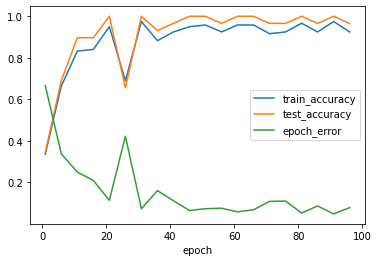

In [22]:
results_df.plot()